# Supervised Learning with Scikit-learn 
# Regression with the Boston housing dataset

(Note: this is a work in progress, it's not finished yet)

We're going to use a dataset of housing prices from the 1970s. In regression, the target variable is continuous.

Track: Machine Learning Scientist With Python

Course: Supervised Learning With Scikit-learn

Chapter: Regression

In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

boston = datasets.load_boston()

print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = boston.data
y = boston.target

First, as an exercise, we will predict price using only one feature: the average number of rooms in a block.

In [4]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [5]:
X_rooms.shape, y.shape

((506,), (506,))

Right now, the numpy arrays are one-dimensional. We need to convert them to 2D for scikit-learn to be able to use them. We passs the parameters -1 and 1. The -1 in the first position means "unknown number of rows". This lets numpy figure out the optimal number of rows. The second parameter, 1, establishes the number of columns. So we're telling numpy we want an ndarray with 1 column and as many rows as needed.

In [6]:
X_rooms = X_rooms.reshape(-1, 1)
y = y.reshape(-1, 1)

In [7]:
X_rooms.shape, y.shape

((506, 1), (506, 1))

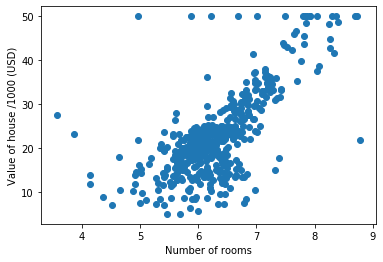

In [8]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 (USD)')
plt.xlabel('Number of rooms')
plt.show()

I noticed something weird going on at the 50k line, as if values higher than 50k were cut to 50k. Indeed, a quick search returned that:

> Gilley and Pace also point out that MEDV is censored, in that median values at or over USD 50,000 are set to USD 50,000. ([Source](https://nowosad.github.io/spData/reference/boston.html))

So I learned that is what "censored" means in the context of data.

### Regression mechanics

How does linear regression actually work? We want to fit a line to the data, and a line in two dimentions is always of the form:

`y = ax + b`

where:

y = target

x = single feature

a,b = parameters of model

So the question of fitting is reduced to: "How do we choose `a` and `b`?"

A common method is to define an **error function** for any given line and then to choose the line that minimizes the error function. Such an error function is also called a **loss function** or a **cost function**.

What will our loss function be? Intuitively, we want the line to be as close to the actual data points as possible. For this reason, we wish to minimize the vertical distance between the fit and the data. So for each data point, we calculate the vertical distance between it and the line. This distance is called a residual. 

<img src='regression_residual.png'>

We could try to minimize the **sum** of the residuals, but then a large positive residual would cancel out a large negative residual. For this reason, we minimize the **sum of the squares** of the residuals. This will be our loss function, which is commonly called **Ordinary Least Squares** or **OLS** for short.

(Note that this is the same as minimizing the mean squared error (MSE) of the predictions on the training set).

When you call the fit method on a linear regression model in scikit-learn, it performs this OLS under the hood.

When we have two features and one target, a line is of the form:

`y = a1x1 + a2x2 + b` 

so to fit a linear regression model is to specify three variables: `a1`, `a2` and `b`

In higher dimensions, that is, when we have more than one or two feature, a line is of this form, 


`y = a1x1 + a2x2 + a3x3 + ... + anxn + b`

so fitting a linear regression model is to specify a coeficcient ai for each feature, as well as the variable b.

The scikit-learn API works exactly the same in this case. You pass the fit method two arrays: one containing the features, the other the target variable.



## Applying linear regression

In [9]:
# Instantiate
reg = LinearRegression()

# Fit
reg.fit(X_rooms, y)

# Check out the regressor's predictions over the range of the data
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)

prediction = reg.predict(X_rooms)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)